In [2]:
#############################################
# Importing Required Packages and Libraries #
#############################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca


########################################
# loading data and setting display options
########################################
# loading data
apple_df = pd.read_excel('./sample_survey_results.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [3]:
########################
# Scree_plot functions #
########################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

In [4]:
#for col in apple_df.columns:
    #print(f" '{col}', ")

In [5]:
###################################################
# Subset variables based on Big Five and HULT DNA #
###################################################

# BIG FIVE TRAITS
apple_df['Openness'] = (apple_df['Have a rich vocabulary']+ 
                        apple_df['Have a vivid imagination']+
                        apple_df['Have excellent ideas']+
                        apple_df['Am quick to understand things']+
                        apple_df['Spend time reflecting on things']+
                        apple_df['Am full of ideas']-
                        apple_df['Am not interested in abstract ideas']-
                        apple_df['Do not have a good imagination'])

apple_df['Conscientiousness'] = (apple_df['Am always prepared']+
                                 apple_df['Pay attention to details']+
                                 apple_df['Start conversations']+
                                 apple_df['Get chores done right away']+
                                 apple_df['Like order']+
                                 apple_df['Follow a schedule']+
                                 apple_df['Am exacting in my work']-
                                 apple_df['Leave my belongings around']-
                                 apple_df['Make a mess of things']-
                                 apple_df['Often forget to put things back in their proper place']-
                                 apple_df['Shirk my duties'])

apple_df['Extraversion'] = (apple_df['Am the life of the party']+
                            apple_df['Feel comfortable around people']+
                            apple_df['Start conversations']+
                            apple_df['Talk to a lot of different people at parties']+
                            apple_df["Don't mind being the center of attention"]-
                            apple_df["Don't talk a lot"]-
                            apple_df['Keep in the background']-
                            apple_df['Have little to say']-
                            apple_df["Don't like to draw attention to myself"]-
                            apple_df['Am quiet around strangers'])

apple_df['Agreeableness'] = (apple_df['Am interested in people']+
                             apple_df["Sympathize with others' feelings"]+
                             apple_df['Have a soft heart']+
                             apple_df['Take time out for others']+
                             apple_df["Feel others' emotions"]+
                             apple_df['Make people feel at ease']-
                             apple_df['Am not really interested in others']-
                             apple_df['Insult people']-
                             apple_df["Am not interested in other people's problems"]-
                             apple_df['Feel little concern for others'])

apple_df['Neuroticism'] = (apple_df['Get stressed out easily']+
                           apple_df['Worry about things']+
                           apple_df['Seldom feel blue']+
                           apple_df['Am easily disturbed']+
                           apple_df['Get upset easily']+
                           apple_df['Change my mood a lot']+
                           apple_df['Have frequent mood swings']+
                           apple_df['Get irritated easily']+
                           apple_df['Often feel blue']-
                           apple_df['Am relaxed most of the time'])

# HULT DNA
apple_df['Team_building'] = (apple_df['Work well with people from diverse cultural backgrounds']+
                             apple_df['Build cooperative relationships']+
                             apple_df['Resolve conflicts constructively']-
                             apple_df["Can't rally people on the team around a common goal"])

apple_df['Thinking'] = (apple_df['Demonstrate an awareness of personal strengths and limitations']+
                        apple_df['Display a growth mindset']+
                        apple_df['See underlying patterns in complex situations'])

apple_df['Communicating'] = (apple_df['Listen carefully to others']+
                             apple_df['Coach teammates for performance and growth']-
                             apple_df["Don't  generate ideas that are new and different"])


In [6]:
# Selecting some varibales for the further analysis
my_apple_df = apple_df.loc[: , ['What laptop do you currently have?',
                            'What laptop would you buy in next assuming if all laptops cost the same?',
                            'What program are you in?', 
                            'What is your age?',
                            'Gender',
                            'What is your nationality? ', 
                            'What is your ethnicity?',
                            'surveyID',
                            'Openness',
                            'Conscientiousness',
                            'Extraversion',
                            'Agreeableness',
                            'Neuroticism',
                            'Team_building',
                            'Thinking',
                            'Communicating']]
apple_number = my_apple_df.drop(['What laptop do you currently have?',
                            'What laptop would you buy in next assuming if all laptops cost the same?',
                            'What program are you in?', 'What is your age?',
                            'Gender',
                            'What is your nationality? ', 
                            'What is your ethnicity?',
                            'surveyID'],
                            axis = 1) 
# Dividing the data into Big Five and HULT DNA
hult_dna = apple_number.loc[:, ['Team_building',
                                'Thinking',
                                'Communicating']]
big_five = apple_number.loc[:, ['Openness',
                                'Conscientiousness',
                                'Extraversion',
                                'Agreeableness',
                                'Neuroticism']]

In [7]:
#####################################################
# Standard scaling both dataset before the analysis #
#####################################################

# Big Five Traits dataset
scaler = StandardScaler()

# Scaling and transforming the data
scaler.fit(big_five)
bigfive_scaled = scaler.transform(big_five)

# Saving the data as a dataframe
big_five_scaled = pd.DataFrame(bigfive_scaled)

# Reattaching the column names
big_five_scaled.columns = big_five.columns

print(pd.np.var(big_five_scaled))

Openness             1.0
Conscientiousness    1.0
Extraversion         1.0
Agreeableness        1.0
Neuroticism          1.0
dtype: float64


<ipython-input-7-1b8d5e009221>:18: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(big_five_scaled))


In [8]:
# HULT DNA data scaling
scaler = StandardScaler()

# Scaling the data and transforming it
scaler.fit(hult_dna)
hultdna_scaled = scaler.transform(hult_dna)

# Saving a scaled data as a dataframe
hult_dna_scaled = pd.DataFrame(hultdna_scaled)

# Reattaching column names
hult_dna_scaled.columns = hult_dna.columns

# Dsiplaying the pre - post scaling variances
print(pd.np.var(hult_dna_scaled))

Team_building    1.0
Thinking         1.0
Communicating    1.0
dtype: float64


<ipython-input-8-0d3ec759c78f>:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(hult_dna_scaled))


Original Shape: (10, 5)
PCA Shape: (10, 5)


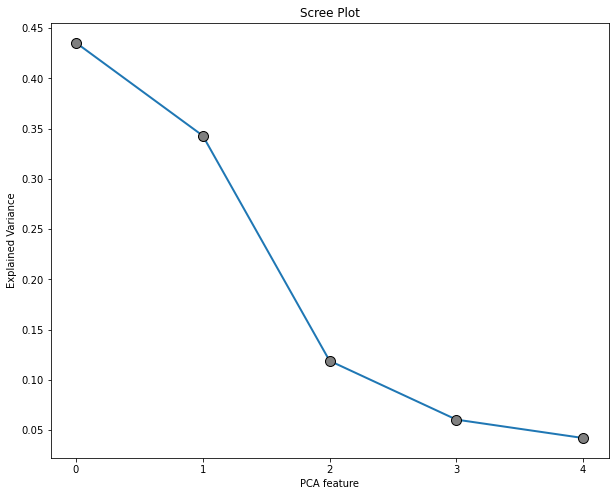

In [9]:
#####################################################
# Principal Component Analysis for BIG FIVE DATASET #
#####################################################

# Big Five Dataset
pca = PCA(n_components = None,
          random_state = 219)
# Fitting and Trasnfornming the scaled data
bigfive_pca = pca.fit_transform(big_five_scaled) 

# Comparing the dimensions of each data frame

print("Original Shape:", big_five_scaled.shape)
print("PCA Shape:", bigfive_pca.shape)

# Displaying Scree Plot to see the elbow point
scree_plot(pca_object = pca)

In [10]:
# INSTANTIATING a new model using the first three principal components
# As you see in the scree plot the elbow point is at 2, thus we take 3 pc for this data
# BIG FIVE DATASET
bfpca3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
bf_pca3 = bfpca3.fit_transform(big_five_scaled) 

In [11]:
#############################
# Evaluating PCA Algarithms #
#############################

# Setting loop over each PC to print out each explained variance ratio
component_number = 0
for variance in bfpca3.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number} : {variance.round(3)}")


# Printing put the sum of all explained variance ratios
print(f"Sum of EVR: {bfpca3.explained_variance_ratio_.sum()}")

PC 1 : 0.435
PC 2 : 0.343
PC 3 : 0.119
Sum of EVR: 0.8973399146728754


In [12]:
# Analyzing PC factor loading for the BIG FIVE DATASET
bf_factor_loading = pd.DataFrame(pd.np.transpose(bfpca3.components_))
bf_factor_loading = bf_factor_loading.set_index(big_five_scaled.columns)
bf_factor_loading.round(3)

<ipython-input-12-b4e79e23a1bf>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  bf_factor_loading = pd.DataFrame(pd.np.transpose(bfpca3.components_))


,0,1,2
Openness,-0.219,-0.672,-0.040
Conscientiousness,0.265,-0.587,-0.572
Extraversion,0.554,-0.220,0.476
Agreeableness,-0.462,-0.387,0.610
Neuroticism,-0.601,0.081,-0.268


In [13]:
# Naming each principal component for the BIG FIVE DATASET
bf_factor_loading.columns = ['Conscientiousness&Extraversion', #planned behavior and communicative
                             'Neuroticism',                    #negative emotions
                             'Extraversion&Agreeableness']     #cooperative and communicative
# pulling the results
bf_factor_loading

,Conscientiousness&Extraversion,Neuroticism,Extraversion&Agreeableness
Openness,-0.219274,-0.671639,-0.039724
Conscientiousness,0.264893,-0.586871,-0.572148
Extraversion,0.554015,-0.219994,0.476215
Agreeableness,-0.462058,-0.386710,0.610344
Neuroticism,-0.601099,0.080882,-0.267896


In [14]:
# Analyzing how much each observation fits into each group for BIG FIVE DATASET
bf_pca3 = pd.DataFrame(bf_pca3)

# renaming columns name
bf_pca3.columns = bf_factor_loading.columns

# checking the results
bf_pca3

,Conscientiousness&Extraversion,Neuroticism,Extraversion&Agreeableness
0,0.793745,-0.900309,-0.360824
1,-1.046012,-1.126614,-1.216884
2,2.529661,0.413018,-0.702025
3,-1.513187,-1.446230,0.816106
4,-0.062895,0.967186,-0.373578
5,-2.197729,1.129918,0.268359
6,-1.529468,0.275939,0.207663
7,1.043458,2.573326,0.889375
8,1.743144,-1.971417,1.241677
9,0.239282,0.085183,-0.769868


Original Shape: (10, 3)
PCA Shape: (10, 3)


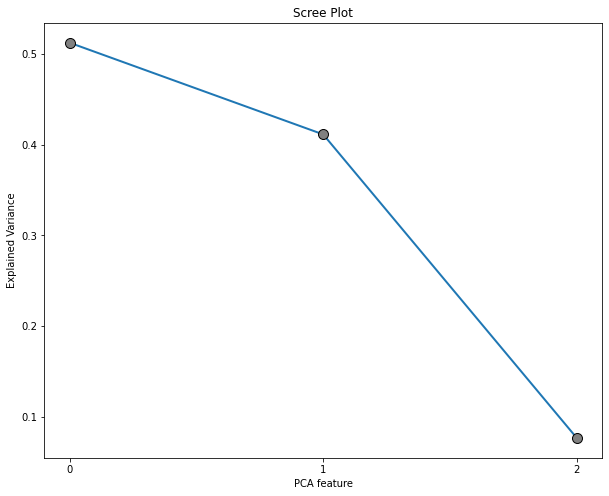

In [15]:
#####################################################
# Principal Component Analysis for HULT DNA DATASET #
#####################################################

pca = PCA(n_components = None,
          random_state = 219)
# Fitting and Trasnfornming the scaled data
bigfive_pca = pca.fit_transform(hult_dna_scaled) 

# Comparing the dimensions of each data frame

print("Original Shape:", hult_dna_scaled.shape)
print("PCA Shape:", hult_dna_scaled.shape)

# Displaying Scree Plot to see the elbow point
scree_plot(pca_object = pca)

In [16]:
# INSTANTIATING a new model using the first three principal components
# As you see in the scree plot ends point is at 2, thus we take 3 pc for this data
# HULT DNA DATASET
hdpca3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
hd_pca3 = hdpca3.fit_transform(hult_dna_scaled) 

In [17]:
#############################
# Evaluating PCA Algarithms #
#############################

# Setting loop over each PC to print out each explained variance ratio
component_number = 0
for variance in hdpca3.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number} : {variance.round(3)}")


# Printing put the sum of all explained variance ratios
print(f"Sum of EVR: {hdpca3.explained_variance_ratio_.sum()}")

PC 1 : 0.512
PC 2 : 0.411
PC 3 : 0.077
Sum of EVR: 1.0


In [18]:
# Analyzing PC factor loading for the HULT DNA DATASET
hd_factor_loading = pd.DataFrame(pd.np.transpose(hdpca3.components_))
hd_factor_loading = hd_factor_loading.set_index(hult_dna_scaled.columns)
hd_factor_loading.round(3)

<ipython-input-18-af72e34c2b47>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  hd_factor_loading = pd.DataFrame(pd.np.transpose(hdpca3.components_))


,0,1,2
Team_building,-0.725,-0.287,-0.626
Thinking,-0.073,-0.872,0.484
Communicating,-0.684,0.397,0.612


In [19]:
# Naming each principal component for HULT DNA DATASET
hd_factor_loading.columns = ['Barely Thinking',          #Could have thinking skills 
                             'Communicating',            #Communicating skills
                             'Thinking&Communicating']   #Thinking and Communicating skills
# pulling the results
hd_factor_loading

,Barely Thinking,Communicating,Thinking&Communicating
Team_building,-0.725384,-0.286756,-0.625770
Thinking,-0.072789,-0.872043,0.483986
Communicating,-0.684485,0.396625,0.611694


In [20]:
# Analyzing how much each observation fits into each group for HULT DNA DATASET
hd_pca3 = pd.DataFrame(hd_pca3)

# renaming columns name
hd_pca3.columns = hd_factor_loading.columns

# checking the results
hd_pca3

,Barely Thinking,Communicating,Thinking&Communicating
0,-0.779994,-0.406727,0.431242
1,-1.221685,2.117114,-0.213293
2,1.677073,0.397423,-0.313090
3,-1.311969,1.035477,0.387017
4,2.425250,0.693189,0.332342
5,0.680726,0.610108,-0.079721
6,0.126070,-1.701049,0.798183
7,-0.905912,-1.063062,-0.770276
8,-1.154082,-0.554611,0.108526
9,0.464524,-1.127863,-0.680929


In [21]:
###############################
# CLustering BIG FIVE DATASET #
###############################

# Standar Scaling of the Big FIve factor loading
scaler = StandardScaler()

# Fitting the scaler with the data and transforming it
scaler.fit(bf_pca3)
bfpca3_scaled = scaler.transform(bf_pca3)

# Converting scaled data into dataframe
bf_pca3_scaled = pd.DataFrame(bfpca3_scaled)

# Reattaching the columns name
bf_pca3_scaled.columns = ['Conscientiousness&Extraversion', #planned behavior and communicative
                          'Neuroticism',                    #negative emotions
                          'Extraversion&Agreeableness']     #cooperative and communicative
# Checking pre-post scaling variance
print(pd.np.var(bf_pca3), '\n\n')
print(pd.np.var(bf_pca3_scaled))

Conscientiousness&Extraversion    2.177095
Neuroticism                       1.714603
Extraversion&Agreeableness        0.595002
dtype: float64 


Conscientiousness&Extraversion    1.0
Neuroticism                       1.0
Extraversion&Agreeableness        1.0
dtype: float64


<ipython-input-21-e45293c78d9a>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(bf_pca3), '\n\n')
<ipython-input-21-e45293c78d9a>:21: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(bf_pca3_scaled))


In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

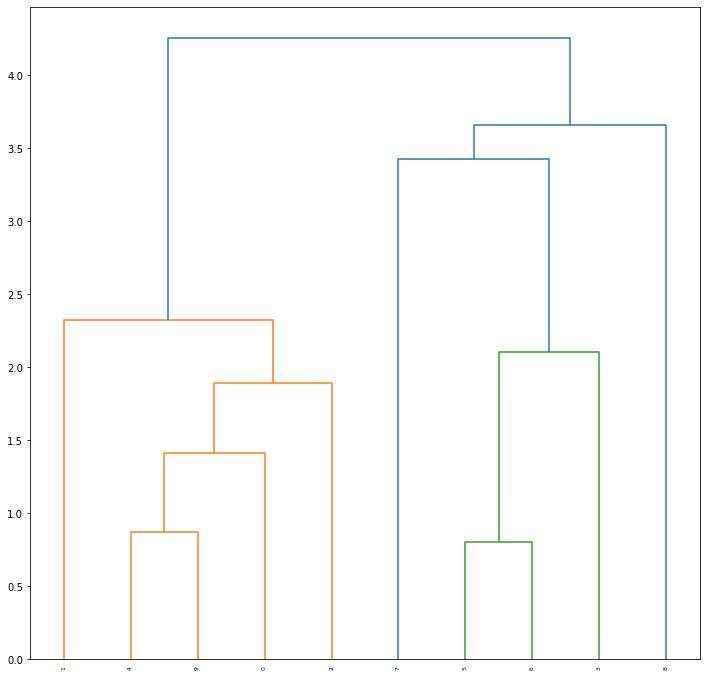

In [23]:
# Grouping the scaled data based on WORD distance
standard_mergings_ward = linkage(y = bf_pca3_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# Setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# Developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# Saving and displaying the plot
plt.show()

In [24]:
# Calling the inertia_plot() function
#interia_plot(data = bf_pca3_scaled)

In [25]:
# Instantiating a k-means object with 3 clusters for BIG FIVE DATASET

bf_pca3_k = KMeans(n_clusters = 3,
                   random_state = 219)

# Fitting the object to the data
bf_pca3_k.fit(bf_pca3_scaled)

# Converting the result to the dataframe
bf_pca3_kmeans = pd.DataFrame({'Cluster': bf_pca3_k.labels_})

# Checking the outcomes
print(bf_pca3_kmeans.iloc[:, 0].value_counts())

0    4
1    4
2    2
Name: Cluster, dtype: int64


In [26]:
# Attaching mean values for each cluster using BIG FIVE DATASET
bfpca3_centroids = bf_pca3_k.cluster_centers_

# Converting cluster centers into a dataframe
bf_centroids_pca3 = pd.DataFrame(bfpca3_centroids)

# Renaming principal components
bf_centroids_pca3.columns = ['Conscientiousness&Extraversion', #planned behavior and communicative
                             'Neuroticism',                    #negative emotions
                             'Extraversion&Agreeableness']     #cooperative and communicative

# Checking the results
bf_centroids_pca3.round(3)

,Conscientiousness&Extraversion,Neuroticism,Extraversion&Agreeableness
0,0.426,-0.292,-0.988
1,-0.465,0.944,0.321
2,0.078,-1.305,1.334


In [27]:
###############################
# CLustering HULT DNA DATASET #
###############################

# Standar Scaling of the Big FIve factor loading
scaler = StandardScaler()

# Fitting the scaler with the data and transforming it
scaler.fit(hd_pca3)
hdpca3_scaled = scaler.transform(hd_pca3)

# Converting scaled data into dataframe
hd_pca3_scaled = pd.DataFrame(hdpca3_scaled)

# Reattaching the columns name
hd_pca3_scaled.columns = ['Barely Thinking',          #Could have thinking skills 
                          'Communicating',            #Communicating skills
                          'Thinking&Communicating']   #Thinking and Communicating skills
# Checking pre-post scaling variance
print(pd.np.var(hd_pca3), '\n\n')
print(pd.np.var(hd_pca3_scaled))

Barely Thinking           1.536422
Communicating             1.233384
Thinking&Communicating    0.230194
dtype: float64 


Barely Thinking           1.0
Communicating             1.0
Thinking&Communicating    1.0
dtype: float64


<ipython-input-27-933a356f04e4>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(hd_pca3), '\n\n')
<ipython-input-27-933a356f04e4>:21: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(hd_pca3_scaled))


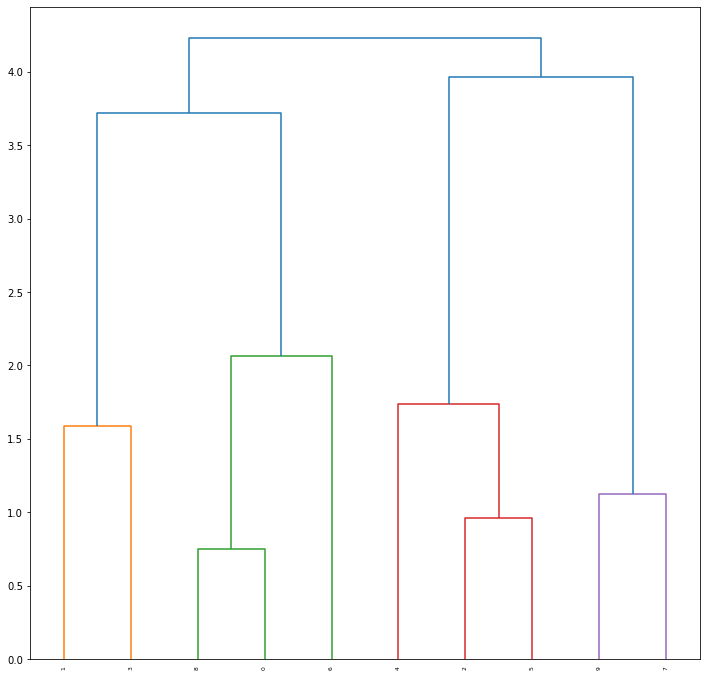

In [28]:
# Grouping the scaled data based on WORD distance
standard_mergings_ward = linkage(y = hd_pca3_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# Setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# Developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# Saving and displaying the plot
plt.show()

In [29]:
# Instantiating a k-means object with 3 clusters for BIG FIVE DATASET

hd_pca3_k = KMeans(n_clusters = 3,
                   random_state = 219)

# Fitting the object to the data
hd_pca3_k.fit(hd_pca3_scaled)

# Converting the result to the dataframe
hd_pca3_kmeans = pd.DataFrame({'Cluster': hd_pca3_k.labels_})

# Checking the outcomes
print(hd_pca3_kmeans.iloc[:, 0].value_counts())

1    5
0    3
2    2
Name: Cluster, dtype: int64


In [30]:
# Attaching mean values for each cluster using BIG FIVE DATASET
hdpca3_centroids = hd_pca3_k.cluster_centers_

# Converting cluster centers into a dataframe
hd_centroids_pca3 = pd.DataFrame(hdpca3_centroids)

# Renaming principal components
hd_centroids_pca3.columns = ['Barely Thinking',          #Could have thinking skills 
                             'Communicating',            #Communicating skills
                             'Thinking&Communicating']   #Thinking and Communicating skills

# Checking the results
hd_centroids_pca3.round(3)

,Barely Thinking,Communicating,Thinking&Communicating
0,1.286,0.510,-0.042
1,-0.701,0.088,0.630
2,-0.178,-0.986,-1.512


In [31]:
# Concatenating all outcomes into one dataframe
# Combining Big Five Results
bf_all_df = pd.concat([bf_pca3_kmeans,
                       bf_pca3],
                       axis = 1)
# Combining HULT DNA Results
hd_all_df = pd.concat([hd_pca3_kmeans,
                       hd_pca3],
                       axis = 1)

In [32]:
# Big FIve Final Dataset
bf_final = pd.concat([my_apple_df.loc[: , ['What laptop do you currently have?',
                                           'What laptop would you buy in next assuming if all laptops cost the same?',
                                           'What program are you in?', 
                                           'What is your age?',
                                           'Gender',
                                           'What is your nationality? ', 
                                           'What is your ethnicity?']],
                     bf_all_df],
                    axis = 1)
# Renaming cluster numbers
bf_cluster_names = {0 : 'Cluster 1',
                    1 : 'Clsuter 2',
                    2 : 'Cluster 3'}
bf_final['Cluster'].replace(bf_cluster_names, inplace = True)

# Setting final columns names
bf_final.columns = ['Current_laptop',
                    'Next_laptop',
                    'Program',
                    'Age',
                    'Gender',
                    'Nationality',
                    'Ethnicity',
                    'Cluster',
                    'Conscientiousness&Extraversion',
                    'Neuroticism',
                    'Extraversion&Agreeableness']

# Checking the results
bf_final

,Current_laptop,Next_laptop,Program,Age,Gender,Nationality,Ethnicity,Cluster,Conscientiousness&Extraversion,Neuroticism,Extraversion&Agreeableness
0,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,Cluster 1,0.793745,-0.900309,-0.360824
1,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,Cluster 1,-1.046012,-1.126614,-1.216884
2,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,Cluster 1,2.529661,0.413018,-0.702025
3,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,Cluster 3,-1.513187,-1.446230,0.816106
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,Clsuter 2,-0.062895,0.967186,-0.373578
5,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,Indian,West Asian / Indian,Clsuter 2,-2.197729,1.129918,0.268359
6,Windows laptop,Macbook,DD (MIB & Business Analytics),23,Female,Dominican,Hispanic / Latino,Clsuter 2,-1.529468,0.275939,0.207663
7,Macbook,Macbook,DD (MIB & Business Analytics),23,Male,Belgian,White / Caucasian,Clsuter 2,1.043458,2.573326,0.889375
8,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25,Female,Swiss,White / Caucasian,Cluster 3,1.743144,-1.971417,1.241677
9,Macbook,Macbook,DD (MBA & Business Analytics),38,Male,Japan,Far east Asian,Cluster 1,0.239282,0.085183,-0.769868


In [33]:
# HULT DNA Final Dataset
hd_final = pd.concat([my_apple_df.loc[: , ['What laptop do you currently have?',
                                           'What laptop would you buy in next assuming if all laptops cost the same?',
                                           'What program are you in?', 
                                           'What is your age?',
                                           'Gender',
                                           'What is your nationality? ', 
                                           'What is your ethnicity?']],
                     hd_all_df],
                     axis = 1)
# Renaming cluster numbers
hd_cluster_names = {0 : 'Cluster 1',
                    1 : 'Cluster 2',
                    2 : 'Cluster 3'}
hd_final['Cluster'].replace(hd_cluster_names, inplace = True)

# Setting final columns names
hd_final.columns = ['Current_laptop',
                    'Next_laptop',
                    'Program',
                    'Age',
                    'Gender',
                    'Nationality',
                    'Ethnicity',
                    'Cluster',
                    'Barely Thinking',
                    'Communicating',
                    'Thinking&Communicating']
# Checking the result
hd_final

,Current_laptop,Next_laptop,Program,Age,Gender,Nationality,Ethnicity,Cluster,Barely Thinking,Communicating,Thinking&Communicating
0,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,Cluster 2,-0.779994,-0.406727,0.431242
1,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,Cluster 2,-1.221685,2.117114,-0.213293
2,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,Cluster 1,1.677073,0.397423,-0.313090
3,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,Cluster 2,-1.311969,1.035477,0.387017
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,Cluster 1,2.425250,0.693189,0.332342
5,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,Indian,West Asian / Indian,Cluster 1,0.680726,0.610108,-0.079721
6,Windows laptop,Macbook,DD (MIB & Business Analytics),23,Female,Dominican,Hispanic / Latino,Cluster 2,0.126070,-1.701049,0.798183
7,Macbook,Macbook,DD (MIB & Business Analytics),23,Male,Belgian,White / Caucasian,Cluster 3,-0.905912,-1.063062,-0.770276
8,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25,Female,Swiss,White / Caucasian,Cluster 2,-1.154082,-0.554611,0.108526
9,Macbook,Macbook,DD (MBA & Business Analytics),38,Male,Japan,Far east Asian,Cluster 3,0.464524,-1.127863,-0.680929


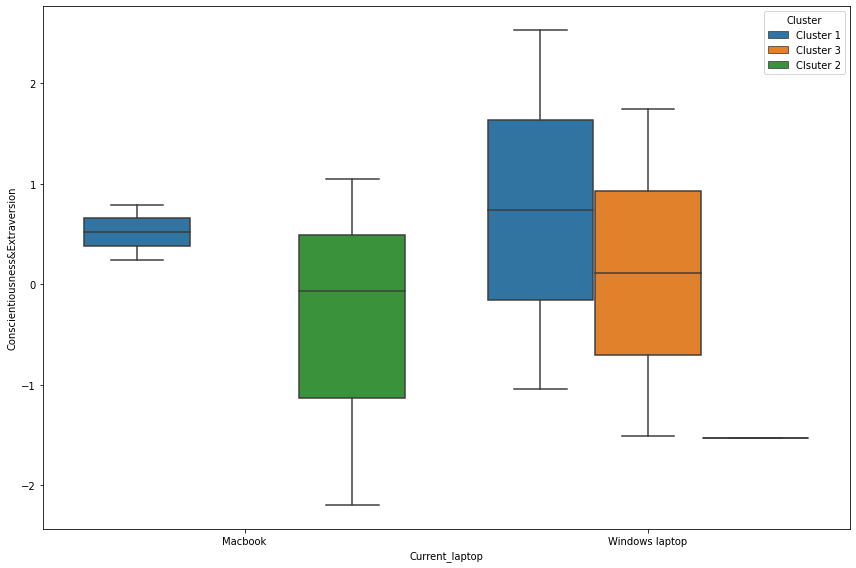

In [34]:
#####################################
# Visualizing the data with boxplot #
#####################################

# Pick any variable you interested and set as x or y
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_laptop',
            y = 'Conscientiousness&Extraversion',
            hue = 'Cluster',
            data = bf_final) # make sure you chnaged the dataset

# Formatting and displaying thr boxplot
plt.tight_layout()
plt.show()

In [35]:
# Subsetting specific customers based on your interest

# make sure you entered exact data and variable you interested
bf_final[bf_final['Neuroticism'] >= 1] 

,Current_laptop,Next_laptop,Program,Age,Gender,Nationality,Ethnicity,Cluster,Conscientiousness&Extraversion,Neuroticism,Extraversion&Agreeableness
5,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,Indian,West Asian / Indian,Clsuter 2,-2.197729,1.129918,0.268359
7,Macbook,Macbook,DD (MIB & Business Analytics),23,Male,Belgian,White / Caucasian,Clsuter 2,1.043458,2.573326,0.889375


<strong>Analysis Report and Results Interpretation</strong><br>
<br>
The analysis done above was aimed to predict consumer behavior towards which laptop an individual would select, Windows or Mac? The survey data was done and collected based on **Big Five Personality** Traits as well as **HULT DNA Leadership Skills** perspective.

The Big FIve are brief categories of human personality treats. The theory has been growing for many years, beginning with the research of D.W.Fiske (1949), then developed by other researchers involving Norman(1967) and Smith(1967). The combination of Big Five categories is known as OCEAN that stand for *Openness, Conscientiousness, Extraversion, Agreeableness and Neuroticism* (Cherry K, 2020).

The HULT DNA is a combination of cognitive-behavioral skills that has been developed by HULT Business School and is used to develop every single student at HULT. It has three sections: *Thinking, Communicating and Team Building* (Dr Shaheem S, 2019).

*Data Description*

The survey data given by Appple consists of 10 observations for a given 76 questions including both categorical and numerical. The categorical questions are individual demographics, age, gender and laptop they are currently using and willing to purchase in the future. The numerical answers are all based on Big Five and HULT DNA perspective and constitute both positive and reverse values. Almost 70 features excluding categorical variables, are categorized under Big Five and HULT DNA personality - behavioral factors. While categorizing the feature all positive values were summed up, then reverse ones were subtracted from the total value. Next, dataset was devided into two group as Bif Five/HULT DNA and analyzed independently. 

*PC Analysis for Two Dataset*<br>

The team conducted principal componenets analysis for both scaled datasets. We took three components for the further analysis as the scree plot demonstrates an elbow point at 2 in the both diagrams. The factor loading results for Big Five and HULT DNA datasets are shown above in the script cells. Based on the results we named the PC columns as following:

<br>Big Five DATASET
<br>Column 0 (Conscientiousness and Extravertion)  - students who are thoughtfulness, goal - directed behaviors and and at the same time sociable and talkative.
<br>Column 1 (Neuroticism) - students who experience often mood swings, irritability and sadness.
<br>Column 2 (Extraversion and Agreeableness) - students who s are socially active and cooperative/high empathy for others.

<br>HULT DNA DATASET
<br>Column 0 (Thinking) - students who have dynamic thinking and self awareness.
<br>Column 1 (Communicating) - students who speak and listens skilfully and able to present ideas effectively.
<br>Column 2 (Thinking and Communicating) - students who are smart but lack in team  building. 

<strong>Big Five Results Interpretation</strong><br>

Once we have done with PC analysis and clustering the outcomes, we decided to visualize data using seaborn boxplot funtion. The boxplot shows that majority of students who are thoughtful, goal - directed bahavior and socially active use Windows laptops and none of them are willing to change the laptop model in the future. Interestingly, 75% of the emotional instable students currently have macbooks and only a male student from China would switch his laptop to Windows. The outcomes for the students who behave socially active and cooperative with others illustrates only two female individual who are currently using Windows laptop and would switch to other laptop model. These students in the Cluster 3 are Indian and Swiss and same ages.<br>

<strong>HULT DNA Interpretation</strong><br>

On the other hand, the results for the students choice on laptop from the HULT DNA perspective is found quite interesting too. Students belong to cluster one who are dynamic thinking and self-awareness turned out Macbook users and almost 60 % of those student would prefer Window model to be their next laptop. They are all male from Asian countries, quite interesting. The following category of students belong to Cluster 2 who are skilled in listening somebody and effectively present ideas. These type of students mostly prefer Windows laptop and only a Dominican female student in MSBA DD program willing to switch to Macbook. Lastly, two male MSBA DD students from Belgium and Japan are found as smart but lack of team building skills. As these students are grouped as Cluster 3 and they both currently use Macbook and would stay as Macbook user in the future too. 

<strong>Comparison</strong><br>

As we did the analysis independently, let's sum up the results. What we found from the analysis the ratio of current laptop model if assume the Big Five and HULT DNA datasets, 3:3 (3 Cluster for Windows and the other 3 for Macbook). Students who are thoughtfull, socially active and able to present ideas effectively currently using Windows laptop. In comparison, people who experience mood swings and less team player but self-aware and smart prefer to use Macbook laptops. The number of students who would switch laptop model in the future are equal for both dataset. That mean number of students switching from Windows to Mac are as same as the students are currently using Mac but would like to have Windows models as a next laptop.

<strong>Reference</strong><br>

Cherry, K. (2020, July 13). What Are the Big 5 Personality Traits? Retrieved February 01, 2021, from https://www.verywellmind.com/the-big-five-personality-dimensions-2795422#:~:text=The%20five%20broad%20personality%20traits,how%20many%20personality%20traits%20exist.<br>

Shaheem, D., &amp; Dr. Samineh ShaheemSamineh Shaheem is Dean of Hult Graduate Programs. (2019, July 05). Why every leader needs a growth mindset. Retrieved February 01, 2021, from https://www.hult.edu/blog/why-every-leader-needs-growth-mindset/ <br>

